In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from os import listdir
import re

### Retrieve data files list

In [2]:
folder = 'data/'
# get all file names
files = [f for f in listdir(folder) if f[-4:]=='.png']
# load one to get the dimensions
image = mpimg.imread(f'{folder}{files[0]}')
# get dimensions
shape = list(image.shape)
# remove alpha if necessary
if (shape[2]==4):
    shape[2] = 3
n = len(files)

### Read in data

In [3]:
y = np.zeros(shape=n,dtype=int)
X = np.zeros(shape=(n,*shape))
for i in range(len(files)):
    # get the hour from the file name
    y[i] = re.search('^([0-9]*)_',files[i])[1]
    # get the pixels, remove the alpha if needed and convert to 0-255
    X[i] = (mpimg.imread(f'{folder}{files[i]}')[:,:,:shape[2]] )
    
# transform y to label encoded
temp = y.copy()
y = np.zeros(shape=(n,12),dtype=int)
for i in range(n):
    y[i,temp[i]-1] = 1   

### Split data to training and test sets

In [4]:
# note, the input files are already shuffled
train = 0.8
cutoff = int(len(X) * train)

X_train = X[:cutoff]
y_train = y[:cutoff]

X_test = X[cutoff:]
y_test = y[cutoff:]

### Observe one sample

2338
[0 0 0 0 0 0 1 0 0 0 0 0]


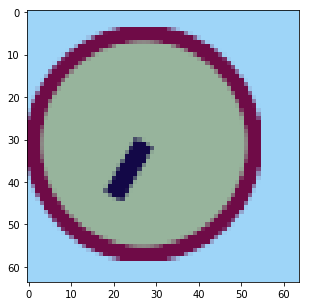

In [5]:
i = np.random.randint(0,n)
print(i)
print(y[i])
plt.figure(figsize=(5,5))
plt.imshow(X[i])
plt.show()

### Network

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, Flatten, MaxPooling2D, Activation, Dropout

Using TensorFlow backend.


In [8]:
model = Sequential()
model.add(Convolution2D(64, kernel_size=3,activation='relu', input_shape=shape))
model.add(Convolution2D(32, kernel_size=3,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(12,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train,
          epochs=20,
          batch_size=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
3200/3200 [==============================] - 69s 22ms/step - loss: 2.4477 - acc: 0.1384
Epoch 2/20
3200/3200 [==============================] - 68s 21ms/step - loss: 1.8558 - acc: 0.3575
Epoch 3/20
3200/3200 [==============================] - 68s 21ms/step - loss: 1.3658 - acc: 0.5078
Epoch 4/20
3200/3200 [==============================] - 66s 21ms/step - loss: 1.0259 - acc: 0.6241
Epoch 5/20
3200/3200 [==============================] - 66s 21ms/step - loss: 0.7700 - acc: 0.7091
Epoch 6/20
3200/3200 [==============================] - 65s 20ms/step - loss: 0.6165 - acc: 0.7791
Epoch 7/20
3200/3200 [==============================] - 62s 19ms/step - loss: 0.4939 - acc: 0.8209
Epoch 8/20
3200/3200 [==============================] - 63s 20ms/step - loss: 0.3889 - acc: 0.8709
Epoch 9/20
3200/3200 [==============================] - 64s 20ms/step - loss: 0.3150 - acc: 0.8884
Epoch 10/20
3200/3200 [==============================] - 64s 

In [10]:
score = model.evaluate(X_test, y_test, batch_size=50)
score

800/800 [==============================] - 3s 4ms/step


[0.3158560013398528, 0.9037499949336052]